In [ ]:
df = pd.read_csv("resumo_2025-01-01_1D.csv", index_col=0, parse_dates=True)
df = df.dropna(axis=1, how="all")
df.to_csv("resumo_2025-01-01_1D.csv")

,conc_fe_media,param_dosagem_amido_media,dosagem_amina_conc_magnetica_media,ph_flotacao_linha01_media,ph_flotacao_linha02_media,densidade_alimentacao_flotacao_media,nivel_celula_li640101_media,TO_LI6401_02_media,nivel_celula_li640201_media,nivel_celula_li640202_media,...,nivel_celula_li641101_n,nivel_celula_li641102_n,nivel_celula_li641201_n,nivel_celula_li641202_n,nivel_celula_li642101_n,nivel_celula_li642201_n,nivel_celula_li643101_n,nivel_celula_li643201_n,vazao_alimentacao_flotacao_n,conc_silica_laudo
intervalo_2h,,,,,,,,,,,,,,,,,,,,,
2024-02-01 00:00:00,63.070,500.000000,150.781667,9.448333,0.000000,1.415000,350.441667,370.138333,354.780000,364.686667,...,6,6,6,6,6,6,6,6,6,2.61
2024-02-01 02:00:00,63.990,495.193333,143.783333,9.441667,0.000000,1.371667,333.208333,366.356667,346.905000,362.718333,...,6,6,6,6,6,6,6,6,6,NaN
2024-02-01 04:00:00,63.930,493.238000,143.720000,9.542000,0.000000,1.216000,338.218000,377.922000,357.326000,358.380000,...,5,5,5,5,5,5,5,5,5,NaN
2024-02-01 22:00:00,63.930,494.050000,143.750000,7.320000,0.000000,1.160000,131.280000,272.160000,0.000000,0.050000,...,1,1,1,1,1,1,1,1,1,NaN
2024-02-02 00:00:00,63.930,494.050000,150.000000,7.900000,0.000000,1.210000,191.570000,273.800000,57.760000,1.470000,...,1,1,1,1,1,1,1,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-31 14:00:00,65.405,516.820000,161.626667,9.363333,9.500000,1.493333,370.523333,370.253333,3.398333,0.040000,...,6,6,6,6,6,6,6,6,6,0.99
2025-01-31 16:00:00,65.450,518.503333,157.548333,9.373333,9.505000,1.596667,368.958333,368.493333,302.355000,245.956667,...,6,6,6,6,6,6,6,6,6,3.23
2025-01-31 18:00:00,65.140,516.700000,160.498333,9.358333,9.486667,1.650000,370.158333,369.805000,380.061667,354.621667,...,6,6,6,6,6,6,6,6,6,4.75


In [ ]:

target = "conc_silica_laudo"
feature_cols = [c for c in df.columns if c.endswith("_mediana") and c != target]

print("Total blocos :", len(df))


Total blocos : 3480


In [38]:
mask_y = df[target].notna()
print("Blocos com laudo :", mask_y.sum())
print("Blocos sem laudo :", (~mask_y).sum())

X = df.loc[mask_y, feature_cols]
y = df.loc[mask_y, target]

Blocos com laudo : 2787
Blocos sem laudo : 693


In [39]:
#  linhas com NaN em qualquer sensor
mask_x = ~X.isna().any(axis=1)
print("Blocos descartados por NaN em sensores:", (~mask_x).sum())

Blocos descartados por NaN em sensores: 0


In [40]:
X = X[mask_x]
y = y[mask_x]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [43]:
rf = RandomForestRegressor(n_estimators=1000, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [45]:
r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R²  : {r2:.3f}")
print(f"MAE : {mae:.2f} %")
print(f"RMSE: {rmse:.2f} %")



R²  : 0.003
MAE : 1.52 %
RMSE: 2.01 %


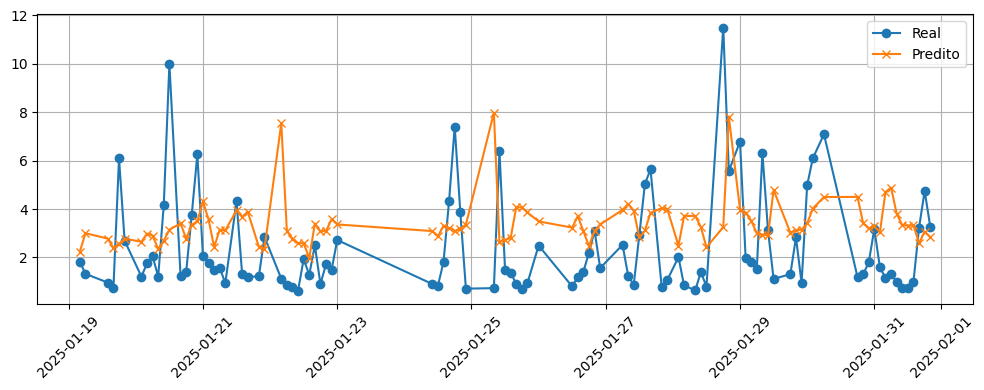

In [47]:

plt.figure(figsize=(10,4))
plt.plot(y_test.tail(100).index, y_test.tail(100).values, 'o-', label="Real")
plt.plot(y_test.tail(100).index, y_pred[-100:], 'x-', label="Predito")
plt.xticks(rotation=45); plt.grid(True); plt.legend(); plt.tight_layout()
plt.show()